In [16]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc

In [2]:
soybean = pd.read_csv("soybean-large_data.csv", na_values = '?')

In [9]:
soybean.isnull().any()

name               False
date                True
plant-stand         True
precip              True
temp                True
hail                True
crop-hist           True
area-damaged        True
severity            True
seed-tmt            True
germination         True
plant-growth        True
leaves             False
leafspots-halo      True
leafspots-marg      True
leafspot-size       True
leaf-shread         True
leaf-malf           True
leaf-mild           True
stem                True
lodging             True
stem-cankers        True
canker-lesion       True
fruiting-bodies     True
external decay      True
mycelium            True
int-discolor        True
sclerotia           True
fruit-pods          True
fruit spots         True
seed                True
mold-growth         True
seed-discolor       True
seed-size           True
shriveling          True
roots               True
dtype: bool

In [8]:
soybean.isnull().any().count()

36

In [12]:
soybean_no_na = soybean.dropna(axis = 'index', how = 'any')
soybean_no_na.shape

(266, 36)

In [17]:
profile = ProfileReport(soybean_no_na, title="Pandas Profiling Report")
profile

In [25]:
X = soybean_no_na.drop(['name', 'leafspots-halo', 'leafspots-marg', 'fruit-pods'], axis = 1)
y = soybean_no_na.name
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify = y)

In [31]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from collections import OrderedDict
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [38]:
clf = RandomForestClassifier(n_estimators=100,
                               warm_start=True, oob_score=True,
                               max_features=None,
                               min_samples_leaf=2, n_jobs=4)

In [39]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_features=None, min_samples_leaf=2, n_jobs=4,
                       oob_score=True, warm_start=True)

In [41]:
y_pred_test = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred_test))

                        precision    recall  f1-score   support

   alternarialeaf-spot       0.79      0.92      0.85        12
           anthracnose       1.00      1.00      1.00         6
      bacterial-blight       0.75      1.00      0.86         3
     bacterial-pustule       1.00      0.67      0.80         3
            brown-spot       1.00      0.92      0.96        12
        brown-stem-rot       1.00      1.00      1.00         6
          charcoal-rot       1.00      1.00      1.00         3
 diaporthe-stem-canker       1.00      1.00      1.00         3
          downy-mildew       1.00      1.00      1.00         3
    frog-eye-leaf-spot       0.90      0.75      0.82        12
phyllosticta-leaf-spot       0.75      1.00      0.86         3
      phytophthora-rot       1.00      1.00      1.00         5
        powdery-mildew       1.00      1.00      1.00         3
     purple-seed-stain       1.00      1.00      1.00         3
  rhizoctonia-root-rot       1.00      

In [52]:
a =clf.feature_importances_
b = clf.classes_
b

array(['alternarialeaf-spot', 'anthracnose', 'bacterial-blight',
       'bacterial-pustule', 'brown-spot', 'brown-stem-rot',
       'charcoal-rot', 'diaporthe-stem-canker', 'downy-mildew',
       'frog-eye-leaf-spot', 'phyllosticta-leaf-spot', 'phytophthora-rot',
       'powdery-mildew', 'purple-seed-stain', 'rhizoctonia-root-rot'],
      dtype=object)

Feature ranking:
1. feature 12 (0.152060)
2. feature 25 (0.115368)
3. feature 0 (0.101085)
4. feature 23 (0.088066)
5. feature 18 (0.076177)
6. feature 19 (0.073873)
7. feature 15 (0.047748)
8. feature 2 (0.036605)
9. feature 20 (0.031989)
10. feature 6 (0.030392)
11. feature 21 (0.024521)
12. feature 5 (0.021397)
13. feature 24 (0.021372)
14. feature 11 (0.019766)
15. feature 9 (0.019582)
16. feature 16 (0.018748)
17. feature 27 (0.016252)
18. feature 1 (0.014946)
19. feature 7 (0.013236)
20. feature 13 (0.011873)
21. feature 26 (0.011190)
22. feature 14 (0.010377)
23. feature 3 (0.010171)
24. feature 31 (0.009289)
25. feature 8 (0.008629)
26. feature 28 (0.004568)
27. feature 4 (0.003974)
28. feature 10 (0.003922)
29. feature 29 (0.002216)
30. feature 17 (0.000608)
31. feature 30 (0.000000)
32. feature 22 (0.000000)


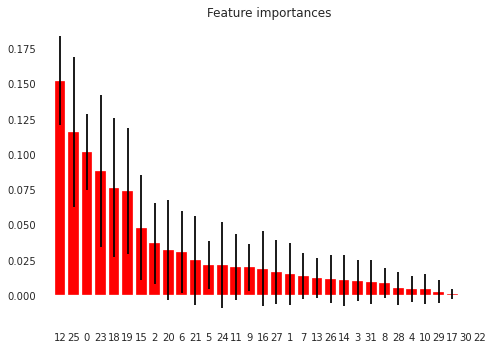

In [56]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [67]:
for i in [0,12,25]:
    print(X.columns[i])

date
leafspot-size
fruit spots


In [ ]:
parameters = {'n_estimators':[50,100], 'min_samples_leaf':[1,5],
              'min_samples_split':[2,5], 'max_depth':[5,10]}
rf_clf = RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features=None, n_jobs = 10)
grid_search_cv_clf = GridSearchCV(rf_clf, parameters, cv = 3)
grid_search_cv_clf.fit(X_train, y_train)

In [ ]:
grid_search_cv_clf.best_params_